### Disciplina de Cálculo Numérico

#### Curso: Engenharia da Computação

#### Discente: Raphaell Maciel de Sousa

#### Data: 19/04/2020

Objetivo: este programa calcula a raiz de uma equação pelo método de Newton-Raphson.

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
from sympy import *

x = Symbol('x')

function = 3*x-1/sqrt(3*x)-3 #sqrt(5-x)-(2**x*2**(-1))
function_prime = function.diff(x)

print function
print function_prime

function_prime = lambdify(x, function_prime)

3*x - 3 - sqrt(3)/(3*sqrt(x))
3 + sqrt(3)/(6*x**(3/2))


In [3]:
#f(x)
def f(x):
    #Domínio da função:
    #x>0 
    return 3*x-1/math.sqrt(3*x)-3 #math.sqrt(5-x)-(2**x*2**(-1))

#### Fase 1: Isolameno da raiz em um intervalo

In [4]:
functionArray = []
xAxisArray = []

contSinal = 0

limInfX = 0.001
limSupX = 2
passoDeCalculo = 0.1

for x in np.arange(limInfX, limSupX, passoDeCalculo, dtype=float):    
    functionArray.append(f(x))
    xAxisArray.append(x)
    
    if f(limInfX) > 0:        
        if f(x) < 0 and contSinal == 0:
            a0 = x-passoDeCalculo
            b0 = x
            print "A raiz está entre o intervalo:"
            print "Limite Inferior:", a0
            print "Limite Superior", b0
            contSinal = 1
            
    else:        
        if f(x) > 0 and contSinal == 0:
            a0 = x-passoDeCalculo
            b0 = x
            print "A raiz está entre o intervalo:"
            print "Limite Inferior:", a0
            print "Limite Superior", b0
            contSinal = 1

A raiz está entre o intervalo:
Limite Inferior: 1.101
Limite Superior 1.201


In [5]:
#https://docs.scipy.org/doc/scipy/reference/optimize.html

from scipy.optimize import fsolve

root = fsolve(f, 0.3)[0]
print "Raiz da equação via Scipy library:", root

Raiz da equação via Scipy library: 1.1773629620793187


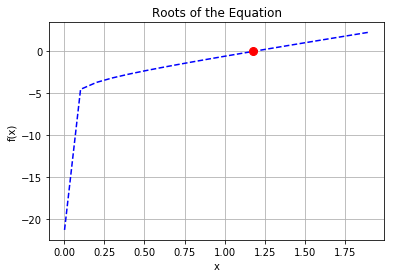

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(xAxisArray, functionArray, 'b--')
plt.plot([root], [0], marker='o', markersize=8, color="red")
ax.set_title("Roots of the Equation")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')
plt.grid(True)
plt.show()

### Fase 2: Refinamento das Raízes

#### 1. Cálculo do Ponto Médio

\begin{equation}
\bar{x} = \frac{a + b}{2}
\end{equation}

In [7]:
def xMedio(a, b):
    xMedio = (a + b)/2.0
    return xMedio

#### Método de Newton-Raphson

\begin{equation}
x_{k+1} = x_{k} - \frac{f(x_{k})}{f'(x_k)}
\end{equation}

In [13]:
cont = 0
a = 1#a0
b = 1.5#b0

x = xMedio(a, b)

stopSimulation = 0

if f(xMedio(a,b)) == 0:
    print "A raiz da Equação é: ", xMedio(a, b)

else:
    while (abs(f(x))>0.01 and stopSimulation == 0):
      
        x = x - f(x)/function_prime(x)        
       
        cont = cont+1
        
print "A raiz da equação pelo método de Newton-Raphson é: ", x
print "Raiz obtida com ", cont, "iterações"

A raiz da equação pelo método de Newton-Raphson é:  1.1771486311772026
Raiz obtida com  1 iterações


In [9]:
print f(x)

-0.00011180040015945636


/home/raphaell/.local/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


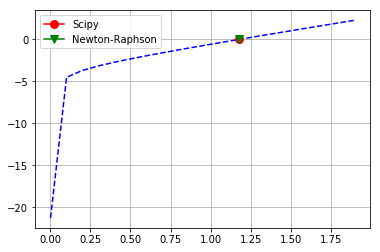

In [10]:
ax = fig.add_subplot(111)

plt.plot(xAxisArray, functionArray, 'b--')
plt.plot([root], [0], marker='o', markersize=8, color='red', label='Scipy')
plt.plot([x], [0], marker='v', markersize=8, color='green', label='Newton-Raphson')

ax.set_title("Roots of the Equation")
ax.set_xlabel('x')
ax.set_ylabel('f(x)')

plt.grid(True)
plt.legend()